In [18]:
import pickle
import pandas as pd

In [19]:
# Open the file in read mode
with open("../../index_history.pkl", "rb") as file:
    # Load the data from the file
    data = pickle.load(file, encoding='latin1')

In [21]:
# Open the file in read mode
with open("../../saved_index.pkl", "rb") as file:
    # Load the data from the file
    df1 = pickle.load(file, encoding='latin1')

FileNotFoundError: [Errno 2] No such file or directory: '../../saved_index.pkl'

In [20]:

# Define the file paths
file_paths = ["../../index_history.pkl", "../../saved_indexes.pkl", "../../saved_symbols.pkl", "../../ticker_history.pkl"]

# Load the data from each file
data_dict = {}

for path in file_paths:
    with open(path, "rb") as file:
        data = pickle.load(file, encoding='latin1')
        data_dict[path] = data

# Access the loaded data
index_history = data_dict["../../index_history.pkl"]
saved_indexes = data_dict["../../saved_indexes.pkl"]
saved_symbols = data_dict["../../saved_symbols.pkl"]
ticker_history = data_dict["../../ticker_history.pkl"]

# Print some information about the loaded data (optional)
print("Index History:", type(index_history), len(index_history))
print("Saved Indexes:", type(saved_indexes), len(saved_indexes))
print("Saved Symbols:", type(saved_symbols), len(saved_symbols))
print("Ticker History:", type(ticker_history), len(ticker_history))


FileNotFoundError: [Errno 2] No such file or directory: '../../saved_indexes.pkl'

In [5]:
# Check the type of `data`
print(type(data))

<class 'dict'>


In [6]:
if isinstance(data, dict):
    # Print the keys of the dictionary
    print(data.keys())

    # Optionally, inspect the contents of a specific key
    first_key = next(iter(data))
    print(f"Contents of the first key ({first_key}):")
    print(data[first_key])

dict_keys(['^GSPC', '^DJI', '^IXIC', '^NYA', '^XAX', '^BUK100P', '^RUT', '^VIX', '^FTSE', '^GDAXI', '^FCHI', '^STOXX50E', '^N100', '^BFX', 'IMOEX.ME', '^N225', '^HSI', '000001.SS', '399001.SZ', '^STI'])
Contents of the first key (^GSPC):
                                  Open         High          Low        Close  \
Date                                                                            
2019-05-13 00:00:00-04:00  2840.189941  2840.189941  2801.429932  2811.870117   
2019-05-14 00:00:00-04:00  2820.120117  2852.540039  2820.120117  2834.409912   
2019-05-15 00:00:00-04:00  2820.379883  2858.679932  2815.080078  2850.959961   
2019-05-16 00:00:00-04:00  2855.800049  2892.149902  2855.800049  2876.320068   
2019-05-17 00:00:00-04:00  2858.600098  2885.479980  2854.229980  2859.530029   
...                                ...          ...          ...          ...   
2024-05-06 00:00:00-04:00  5142.419922  5181.000000  5142.419922  5180.740234   
2024-05-07 00:00:00-04:00  5187.2

In [9]:
# Inspect the structure of the data
print(type(data))
print(data.keys())

# Print a sample of the data
for key in data:
    print(f"{key}: {type(data[key])}")
    print(data[key][:5])  # Print the first 5 elements to understand the structure


<class 'dict'>
dict_keys(['^GSPC', '^DJI', '^IXIC', '^NYA', '^XAX', '^BUK100P', '^RUT', '^VIX', '^FTSE', '^GDAXI', '^FCHI', '^STOXX50E', '^N100', '^BFX', 'IMOEX.ME', '^N225', '^HSI', '000001.SS', '399001.SZ', '^STI'])
^GSPC: <class 'pandas.core.frame.DataFrame'>
                                  Open         High          Low        Close  \
Date                                                                            
2019-05-13 00:00:00-04:00  2840.189941  2840.189941  2801.429932  2811.870117   
2019-05-14 00:00:00-04:00  2820.120117  2852.540039  2820.120117  2834.409912   
2019-05-15 00:00:00-04:00  2820.379883  2858.679932  2815.080078  2850.959961   
2019-05-16 00:00:00-04:00  2855.800049  2892.149902  2855.800049  2876.320068   
2019-05-17 00:00:00-04:00  2858.600098  2885.479980  2854.229980  2859.530029   

                               Volume  Dividends  Stock Splits  
Date                                                            
2019-05-13 00:00:00-04:00  3900270000  

In [10]:
# Create an empty list to store DataFrames with an additional 'Index' column
df_list = []

for key, df in data.items():
    # Add a new column to identify the source index
    df['Index'] = key
    df_list.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(df_list)

# Display the combined DataFrame
print(combined_df.head())

                                  Open         High          Low        Close  \
Date                                                                            
2019-05-13 00:00:00-04:00  2840.189941  2840.189941  2801.429932  2811.870117   
2019-05-14 00:00:00-04:00  2820.120117  2852.540039  2820.120117  2834.409912   
2019-05-15 00:00:00-04:00  2820.379883  2858.679932  2815.080078  2850.959961   
2019-05-16 00:00:00-04:00  2855.800049  2892.149902  2855.800049  2876.320068   
2019-05-17 00:00:00-04:00  2858.600098  2885.479980  2854.229980  2859.530029   

                               Volume  Dividends  Stock Splits  Index  
Date                                                                   
2019-05-13 00:00:00-04:00  3900270000        0.0           0.0  ^GSPC  
2019-05-14 00:00:00-04:00  3354860000        0.0           0.0  ^GSPC  
2019-05-15 00:00:00-04:00  3140900000        0.0           0.0  ^GSPC  
2019-05-16 00:00:00-04:00  3338470000        0.0           0.0  ^GSPC  


In [11]:
# View available indexes
print(combined_df['Index'].unique())

['^GSPC' '^DJI' '^IXIC' '^NYA' '^XAX' '^BUK100P' '^RUT' '^VIX' '^FTSE'
 '^GDAXI' '^FCHI' '^STOXX50E' '^N100' '^BFX' 'IMOEX.ME' '^N225' '^HSI'
 '000001.SS' '399001.SZ' '^STI']


In [12]:
# Function to view data for a specific index
def view_index_data(index_name):
    index_data = combined_df[combined_df['Index'] == index_name]
    print(f"Data for {index_name}:")
    print(index_data.head())

# View data for different indexes
view_index_data('^GSPC')
view_index_data('^DJI')
view_index_data('^IXIC')

Data for ^GSPC:
                                  Open         High          Low        Close  \
Date                                                                            
2019-05-13 00:00:00-04:00  2840.189941  2840.189941  2801.429932  2811.870117   
2019-05-14 00:00:00-04:00  2820.120117  2852.540039  2820.120117  2834.409912   
2019-05-15 00:00:00-04:00  2820.379883  2858.679932  2815.080078  2850.959961   
2019-05-16 00:00:00-04:00  2855.800049  2892.149902  2855.800049  2876.320068   
2019-05-17 00:00:00-04:00  2858.600098  2885.479980  2854.229980  2859.530029   

                               Volume  Dividends  Stock Splits  Index  
Date                                                                   
2019-05-13 00:00:00-04:00  3900270000        0.0           0.0  ^GSPC  
2019-05-14 00:00:00-04:00  3354860000        0.0           0.0  ^GSPC  
2019-05-15 00:00:00-04:00  3140900000        0.0           0.0  ^GSPC  
2019-05-16 00:00:00-04:00  3338470000        0.0        

In [13]:
#Get summary statistics
summary_stats = combined_df.groupby('Index')['Close'].describe()
print(summary_stats)


            count          mean          std           min           25%  \
Index                                                                      
000001.SS  1214.0   3203.304237   241.309708   2660.169922   2999.525024   
399001.SZ  1214.0  11807.496540  1957.053837   7964.709961  10104.980225   
IMOEX.ME   1241.0   2976.840943   550.475331   1916.969971   2606.550049   
^BFX       1283.0   3741.474930   318.425824   2528.770020   3552.925049   
^BUK100P   1264.0    713.525158    59.671171    496.660004    695.509979   
^DJI       1259.0  31793.180049  4047.419567  18591.929688  28279.945312   
^FCHI      1284.0   6315.149814   929.146843   3754.840088   5608.997437   
^FTSE      1262.0   7149.892563   591.155066   4993.899902   6969.725098   
^GDAXI     1274.0  14278.939849  1799.764386   8441.709961  12945.757324   
^GSPC      1259.0   3918.080343   652.983171   2237.399902   3336.609985   
^HSI       1233.0  23040.900520  4129.530000  14687.019531  19463.630859   
^IXIC      1

In [14]:
#mean closing price
mean_close = combined_df.groupby('Index')['Close'].mean()
print(mean_close)


Index
000001.SS     3203.304237
399001.SZ    11807.496540
IMOEX.ME      2976.840943
^BFX          3741.474930
^BUK100P       713.525158
^DJI         31793.180049
^FCHI         6315.149814
^FTSE         7149.892563
^GDAXI       14278.939849
^GSPC         3918.080343
^HSI         23040.900520
^IXIC        12131.628071
^N100         1210.697242
^N225        27431.672334
^NYA         14929.430953
^RUT          1841.490985
^STI          3095.921453
^STOXX50E     3861.725747
^VIX            21.258405
^XAX          3356.851703
Name: Close, dtype: float64


In [16]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


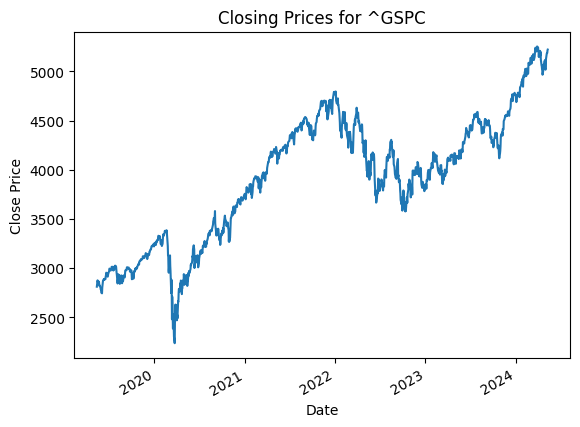

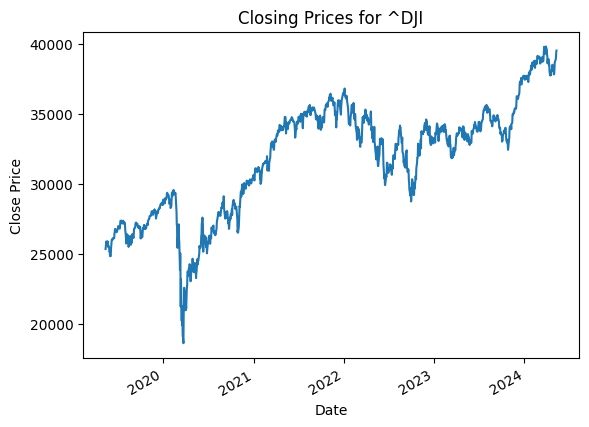

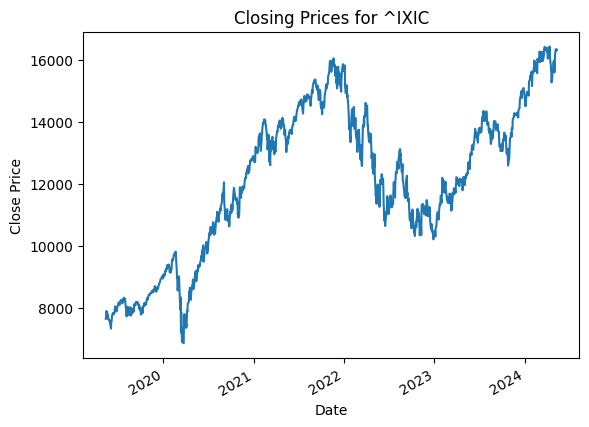

In [17]:
#Plot the closing prices for a specific index
def plot_index_data(index_name):
    index_data = combined_df[combined_df['Index'] == index_name]
    index_data['Close'].plot(title=f"Closing Prices for {index_name}")
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.show()

# Plot closing prices for different indexes
plot_index_data('^GSPC')
plot_index_data('^DJI')
plot_index_data('^IXIC')